# VARS-TOOL Quick Start Tutorial

## Install

This is a simple tutorial show casing VARS-TOOL functionalities that are being implement in Python. Let's install the latest VARS-TOOL from GitHub: 

note: if the loading bars are not working, simply turn them off or install a lower version of pandas by doing the following:
`!pip install pandas==1.2.5`

In [40]:
!rm -rf vars-tool
!git clone https://github.com/vars-tool/vars-tool
!pip install vars-tool/.

'rm' is not recognized as an internal or external command,
operable program or batch file.
Cloning into 'vars-tool'...


Processing c:\users\corde\giws\vars-tool\general_tutorials\vars-tool
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for varstool: filename=varstool-2.3.1-py2.py3-none-any.whl size=68304 sha256=cfc7f67e1f12b6296731ef533fb52051e2930ceedcce04ecc920e53026bcbda4
  Stored in directory: c:\users\corde\appdata\local\pip\cache\wheels\46\5e\80\e26b7d58edb4185ce5c85f72849c985ce03468e17dacb484ac
Successfully built varstool
  Attempting uninstall: varstool
    Found existing installation: varstool 2.3.1
    Uninstalling varstool-2.3.1:
      Successfully uninstalled varstool-2.3.1


## Example using the Ishigami and wavy6D models using online mode

The online mode of VARS tool is where the models are ran in the VARS analysis

Let's import VARS for the analysis and the Model class for creating a wrapper around the desired model so that it can be inputted into VARS

In [1]:
# importing VARS and Model from varstool package
from varstool import VARS, Model

# these are being imported in order for us to display the data nicely on the notebook
import numpy as np
import pandas as pd

Here is a quick function definition of the Ishigami model:

In [2]:
def ishigami(x, a=7, b=0.05):
    '''Ishigami test function'''
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 3:
        raise ValueError('`x` must have only three arguments at a time')
    
    return np.sin(x[0]) + a*(np.sin(x[1])**2) + b*(x[2]**4)*np.sin(x[0])

Here is a quick function definition of the wavy6D model:

In [3]:
def wavy6D(x):
    '''wavy6D test function'''
    
# The features include:             
# (1) The 6 input factors are non-interacting                  
# (2) The function is "wavy" along the first 5 dimensions but with different 
#     frequencies and amplitude at different directions                                     
# (3) The last dimension (X6) is fully isensitive (dummy variable)                                         
# (4) It possess large-scale features such multi-modality (X1) 
#     to small-scale features such as roughness (X3)          
# (5) The directional variograms of X1 and X2 cross each other
    
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 6:
        raise ValueError('`x` must have only five arguments at a time')
    
    y1 = -1*np.sin(2*np.pi*x[0]/2) - 0.3*np.sin(2*np.pi*x[0]/0.6)
    y2 = 0.76*(-1*np.sin(2*np.pi*(x[1]-0.2)/2)) - 0.315
    y3 = 0.12*(-1*np.sin(2*np.pi*(x[2]-0.2)/1.9)) + 0.02*(-1*np.sin(2*np.pi*x[2]/0.021)) - 0.96
    y4 = 0.12*(-1*np.sin(2*np.pi*(x[3]-0.2)/1.9))-0.97
    y5 = 0.05*(-1*np.sin(2*np.pi*(x[4]-0.2)/2))-1.02
    y6 = -1.08

    return y1 + y2 + y3 + y4 + y5 + y6

As mentioned previously The `Model` class is a wrapper for custom functions(models) in the online version of VARS. However, the first paramter of every function must accept an array of parameters

Here we will create two wrappers for the testing models ishigami and wavy6D:

In [4]:
ishigami_model = Model(ishigami)

In [5]:
wavy6D_model = Model(wavy6D)

When creating an experiment you will need to assign a variable to an instance of VARS as shown below.

The paramters of the VARS class are described as:

**paramaters**: the name of each paramter along with their upper and lower bounds

**num_stars**: the total number of star samples that are desired for STAR-VARS analysis

**delta_h**: the sampling resolution of the VARS analysis

**ivars_scales**: the scales that are to be used when doing IVARS, e.g, 0.1 and 0.3 correspond (0-0.1) and (0-0.3) <br /> note: can not have a scale larger then 0.5

**star_centres**: This is only used if a sampler is not chosen and you are wanting to generate your own star centres(randomized numbers)

**sampler**: the sampling strategy: `rnd`, `lhs`, `plhs`, `sobol_seq`, or `halton_seq` for generation of star centers.

**slice_size**: the slice size used only for `plhs` sampling

**seed**: the seed number for randomization of the sampling strategy specified by `sampler`, only needed if a sampler was chosen <br /> note: seed is a randomized integer from 1 to 123456789 as default if no seed is chosen

**model**: the wrapper of your model you made when using the `Model` class

**bootstrap_flag**: this is a True/False value that specifies if bootstrapping will be used in the VARS analysis

**bootstrap_size**: the number of sampling iterations with replacement

**bootstrap_ci**: the bootstrap-based confidence interval on results

**grouping_flag**: this is a True/False value that specifies if paramater grouping will be used in the VARS analysis

**num_grps**: the number of groups you want to split your paramaters into, if left blank the optimal number of groups will be calculated by VARS

**report_verbose**: this is a True/False value that if True will display a loading bar to show the progession of the VARS analysis, else there will be no progression loading bar

Create `experiment_1` and `experiment_2` then initialize the values needed to run a VARS analysis:

`experiment_1` is an instance of VARS that is using the ishigami model

In [6]:
experiment_1 = VARS(parameters = {'x1':(-3, 3), 'x2':(-2, 4), 'x3': (0, 1)},
                    num_stars=10,
                    delta_h = 0.1,
                    ivars_scales = (0.1, 0.3, 0.5),
                    sampler = 'plhs',
                    slice_size = 5,
                    seed = 123456789,
                    model = ishigami_model,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci=0.9,
                    grouping_flag=True,
                    num_grps=2,
                    report_verbose=True,
                )

`experiment_2` is an instance of VARS that is using the wavy6D model

In [7]:
experiment_2 = VARS(parameters = {'x1':(0, 1), 'x2':(0, 1), 'x3': (0, 1), \
                                  'x4':(0, 1), 'x5':(0, 1), 'x6': (0, 1)},
                    num_stars=10,
                    delta_h = 0.1,
                    ivars_scales = (0.1,),
                    sampler = 'rnd',
                    seed = 123456789,
                    model = wavy6D_model,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci=0.9,
                    grouping_flag=True,
                    num_grps=2,
                    report_verbose=True,
                )

A report displaying the current status of the VARS analysis can be found by typing in the variable name of the instance you created, here this is `experiment_1`

In [8]:
experiment_1

Star Centres: 10 Centers Loaded
Star Points: Not Loaded
Parameters: 3 paremeters set
Delta h: 0.1
Model: ishigami
Seed Number: 123456789
Bootstrap: On
Bootstrap Size: 100
Bootstrap CI: 0.9
Grouping: On
Number of Groups: 2
Verbose: On
VARS Analysis: Not Done

To run the VARS analysis we can simply do the following:

note: we are using `experiment_1` here, but `experiment_2` can be used in the same exact way

In [9]:
experiment_1.run_online()

model evaluation:   0%|          | 0/280 [00:00<?, ?it/s]

building pairs:   0%|          | 0/30 [00:00<?, ?it/s]

VARS analysis:   0%|          | 0/10 [00:00<?, ?it/s]

factor ranking:   0%|          | 0/2 [00:00<?, ?it/s]

bootstrapping and grouping:   0%|          | 0/100 [00:00<?, ?it/s]

Now if we take a look at the status report again we can see that the `Vars Analysis` is now done.

In [17]:
experiment_1

Star Centres: 10 Centers Loaded
Star Points: Loaded
Parameters: 3 paremeters set
Delta h: 0.1
Model: ishigami
Seed Number: 123456789
Bootstrap: On
Bootstrap Size: 100
Bootstrap CI: 0.9
Grouping: On
Number of Groups: 2
Verbose: On
VARS Analysis: Done

Users can create their own plots from the resulting dataframes, but there is also access to the two plots given by the VARS program. They can be shown by doing the following:

note: the plot function returns the resulting plots axes, and the barchart figure incase the user wants to edit the plots

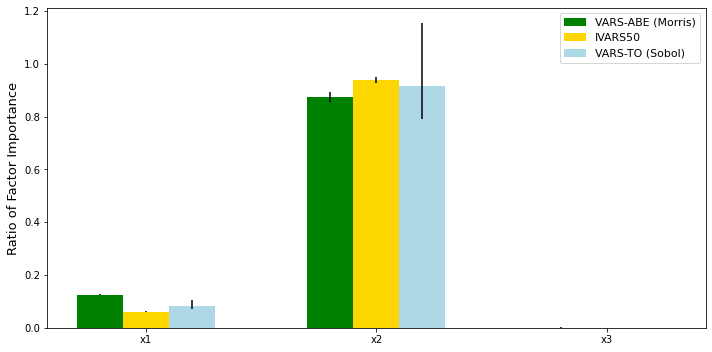

In [18]:
barfig, barax = experiment_1.factorimportance_plot()

Most useful results are stored in the `.output` property as a dictionary. The variables stores could be seen quickly by:

In [12]:
experiment_1.output.keys()

dict_keys(['Gamma', 'ST', 'MAEE', 'MEE', 'COV', 'ECOV', 'IVARS', 'IVARSid', 'rnkST', 'rnkIVARS', 'Gammalb', 'Gammaub', 'MAEElb', 'MAEEub', 'STlb', 'STub', 'IVARSlb', 'IVARSub', 'relST', 'relIVARS', 'Groups', 'relGrp'])

and each output can be viewed by using the method shown in the next line:

In [ ]:
experiment_1.output['Gamma'].unstack(level=0) # adding unstack to make it more legible

Now we can access all the results using 'dot' notation on our created instance:

**Directional variogram results**

There are 10 rows as the number of stars was 10, and each at a resolution incremented by 0.1 which was specificed to be the sampling resolution

In [ ]:
experiment_1.gamma.unstack(0)

**Integrated variogram**

In [ ]:
experiment_1.ivars

**VARS-TO: Sobol total-order effects calculated through VARS**

In [ ]:
experiment_1.st

**VARS-ABE: Morris mean absolute elementary effects across scales**

In [ ]:
experiment_1.maee.unstack(0)

**VARS-ACE: Morris mean actual elementary effects across scales**

In [ ]:
experiment_1.mee.unstack(0)

**The factor(parameter) rankings based on their influence for IVARS and Sobol results**. 

The influence is based on how large or small a result is. The lower the ranking the more influential(larger) a factor is.

In [ ]:
experiment_1.ivars_factor_ranking

In [ ]:
experiment_1.st_factor_ranking

**Bootstrapping results based on the confidence interval limits**

low is the lower limit of the results after `bootstrap_size` sampling iterations

upp is the upper limit of the results after `bootstrap_size` sampling iterations

In [ ]:
experiment_1.gammalb

In [ ]:
experiment_1.gammaub

In [ ]:
experiment_1.stlb

In [ ]:
experiment_1.stub

In [ ]:
experiment_1.ivarslb

In [ ]:
experiment_1.ivarsub

**Reliability estimates of factor rankings based on VARS-TO**

reliability estimates give the ratio of how many bootstrapped rankings were the same as the initial rankings for `bootstrap_size` sampling iterations

In [ ]:
experiment_1.rel_st_factor_ranking

In [ ]:
experiment_1.rel_ivars_factor_ranking

**Factor grouping based on IVARS50 and Sobol results**

In [ ]:
experiment_1.ivars50_grp

In [ ]:
experiment_1.st_grp

**Reliability estimates of rankings based on grouping**

In [ ]:
experiment_1.reli_st_grp

In [ ]:
experiment_1.reli_ivars50_grp

#### Advanced Results

**Directional covariogram results**

In [ ]:
experiment_1.cov.unstack(0)

**Directional expected covariogram results**

In [ ]:
experiment_1.ecov.unstack(0)

## Example using the Ishigami model in offline mode

The offline mode of VARS tool is where the models are ran outside of the VARS analysis

So again, we start with creating `experiment_3`

In [ ]:
experiment_3 = VARS(parameters = {'x1':(0, 1), 'x2':(0, 1), 'x3': (0, 1)},
                    num_stars=10,
                    delta_h = 0.1,
                    ivars_scales = (0.1, 0.3, 0.5),
                    sampler = 'rnd',
                    seed = 123456789,
                    model = ishigami_model,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci=0.9,
                    grouping_flag=True,
                    num_grps=2,
                    report_verbose=True,
                )

What we will be doing first is generating the `star_points` based of the star centre samples generated in the VARS instance using a method named `generate_star`

In [ ]:
star_points = experiment_3.generate_star()

Now you will have access to the star points that you can apply to your model outside of Python or VARS

In [ ]:
star_points

These star points (along with any of the VARS result data frames) can be extracted to a .csv file by doing the following:

note: the format of the .csv file will be the exact same as the data frame shown above but with `,` as the delimeter

In [ ]:
path = 'star_points'  # type your desired file path here as a string (right now a file named star_points will be put in your current working directory)
star_points.to_csv(path)

*****
Here I will be creating the `star_points_results` csv file with ishigami applied to all the star points 

**NOTE**: this is the same as what is done in online mode and is just for example, you should do this your own way if you are wanting to use offline mode

In [ ]:
# **** you do not need to understand this block of code ****
applied_df = star_points.merge(star_points.drop_duplicates()
                     .assign(**{ishigami.__name__: lambda x: x.apply(ishigami, axis=1)}), 
                     how='left')

applied_df.index = star_points.index

applied_df.to_csv('star_points_results')

****
Now after you apply your model to the star points you must put your results in the right most column of the .csv file, with the header of the column being the name of the model you are using. This can be done in excel, notepad, etc. Once the results are placed in the .csv file correctly we must convert it back to a data frame to run the VARS analysis by doing the following:

note: this dataframe is the standard format that is expected to be inputted into the `run_offline` method

In [ ]:
modelframe = pd.read_csv('star_points_results', index_col=[0, 1, 2])
modelframe

Now to run the VARS analysis simply do the following:

In [ ]:
experiment_3.run_offline(modelframe)

Now all the results can be accesed the exact same way as they were for online mode with `experiment_1` and `experiment_2`

# DIY

How about you test `experiment_2` yourself? 

In [ ]:
experiment_2